3DDiff file 
=========================================================================

Set values of diffusivity within canyon from another Kv file. 

K. Ramos-Musalem

In [69]:
import numpy as np

import matplotlib.pyplot as plt

import struct

from netCDF4 import Dataset


%matplotlib inline

In [70]:
import canyon_tools.readout_tools as rout

In [87]:
#Input 
nx = 616
ny = 360
nz = 90

kv_bg = 1E-5
kv_can = 1E-2

In [88]:
## Get grid variables
filename='/data/kramosmu/results/TracerExperiments/CNTDIFF_n/run42/gridGlob.nc'
GridOut = Dataset(filename)

hFacC = rout.getField(filename,'HFacC') #(90,616,360)

Y = GridOut.variables['Y']
RC = GridOut.variables['RC']
X = GridOut.variables['X']

diff_array = np.where(hFacC > 0, kv_bg, kv_can) 
    
np.shape(diff_array)

(90, 360, 616)

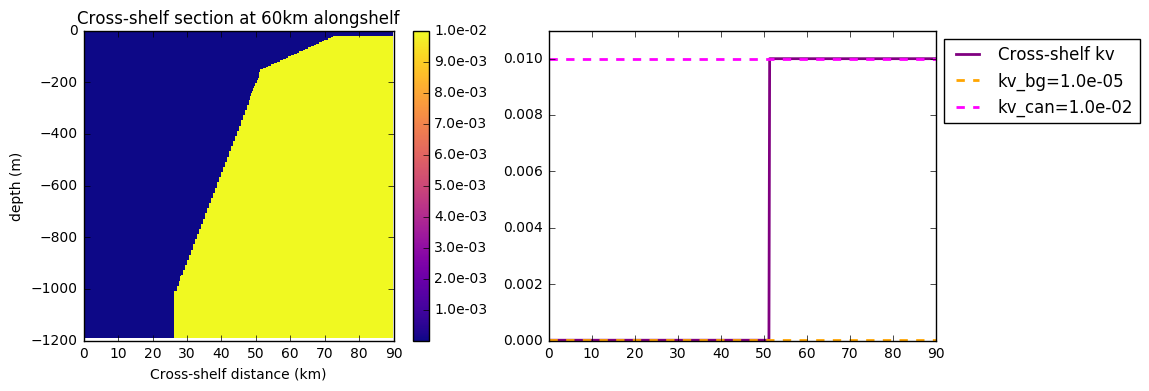

In [89]:
# Check diffusivity
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(11,4))

pcol=ax1.pcolor(Y[:]/1000,RC[:],diff_array[:,:,180],cmap='plasma')
plt.colorbar(pcol, ax=ax1, format='%1.1e')

ax1.set_ylabel('depth (m)')
ax1.set_xlabel('Cross-shelf distance (km)')
ax1.set_title('Cross-shelf section at 60km alongshelf')

ax2.plot(Y[:]/1000,diff_array[30,:,180],color='purple', linewidth=2, label='Cross-shelf kv')
ax2.axhline(kv_bg,linestyle='--',color='orange', linewidth=2, label='kv_bg=%1.1e' %kv_bg)
ax2.axhline(kv_can,linestyle='--',color='magenta', linewidth=2, label='kv_can=%1.1e' %kv_can)
ax2.set_ylim(0,kv_can+(kv_can*0.1))
ax2.legend(loc=0, bbox_to_anchor=(1,1))


In [90]:
# saving binary files

dt = np.dtype('>f8')  # float 64 big endian

filename = "%dx%dx%d/KrDiff1E_5_1E_2_%dzlev_%dx%d_Quad.bin" %(nx,ny,nz,nz,nx,ny)
#fileobj = open(tmpfile, mode='wb')
#kk=np.transpose(kv_new)
#kk.astype(dt).tofile(fileobj,"")
#fileobj.close()

fileobj = open(filename,mode='wb')
diff_array.astype(dt).tofile(fileobj,"")
fileobj.close()


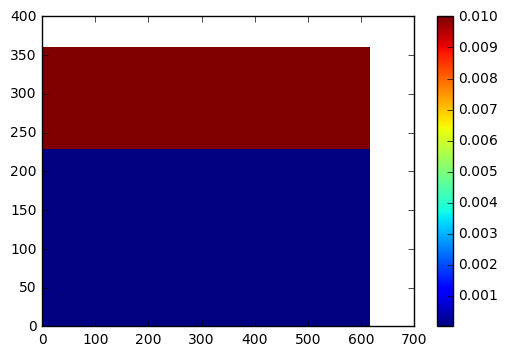

In [91]:
# Check taht the values of the file are in the right order 

dt = np.dtype('>f8')  # float 64 big endian

fileNAME = "%dx%dx%d/KrDiff1E_5_1E_2_%dzlev_%dx%d_Quad.bin" %(nx,ny,nz,nz,nx,ny)
kv=np.fromfile(fileNAME, dt)

Kv=np.reshape(kv,(nz,ny,nx),order='C')
np.shape(Kv)

plt.pcolor(Kv[29,:,:])
plt.colorbar()